In [19]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## 분석에 필요한 다양한 라이브러리를 import합니다.
1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
    - <https://pandas.pydata.org/docs/user_guide/index.html>

2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
    - <https://numpy.org/doc/stable/>


3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
    - <https://matplotlib.org/stable/users/index>


4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
    - <https://scikit-learn.org/stable/user_guide.html>

In [28]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('tox21_dataset.csv')
df = df.dropna(subset=['NR-AR'])
df = df.drop(columns=['NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'])
df = df.drop(columns='mol_id')
df

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 데이터 내의 결측값들을 제거합니다.

반응변수, NR-AR을 제외한 다른 반응변수들은 제거합니다.

## 데이터프레임의 전체적인 모습은 위와 같습니다.

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

- 독립 변수는 마지막 열을 제외한 모든 열입니다.
- 종속 변수는 마지막 열입니다.

In [30]:
from sklearn.ensemble import RandomForestClassifier


# 로지스틱 회귀 모델 생성
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

## 모델을 생성합니다.

선택한 모델은 random forest classifier입니다. 
- random forest는 decision tree를 여러개 합쳐놓은 것으로, decision tree의 단점인 overfitting을 해결하기 위해 제안되었습니다. random forest의 가장 큰 특징은 변수를 랜덤하게 선택하여 여러개의 decision tree를 만들고, 각 tree의 결과를 종합하여 최종 결과를 도출한다는 점입니다. 이를 통해 overfitting을 방지하고, 높은 정확도를 보장합니다.

## random forest classifier은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수 (지니 불순도)
$$
I_G(t) = 1 - \sum_{i=1}^{c} p(i|t)^2
$$
- random forest classifier는 여러 개의 결정 트리를 생성하여 각 결정 트리의 예측값들을 평균하여 예측합니다. 따라서, 각 결정 트리의 목적함수는 지니 불순도를 사용합니다.

1. n_estimators: 생성할 결정 트리의 개수
2. max_depth: 생성할 결정 트리의 최대 깊이
3. max_features: 각 결정 트리에서 사용할 특성의 최대 개수
4. min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
5. min_samples_leaf: 리프 노드의 최소 샘플 데이터 수
6. max_leaf_nodes: 리프 노드의 최대 개수
7. random_state: 난수 시드

- 위의 하이퍼파라미터들은 모두 트리의 복잡도를 조절하는데 사용됩니다. 자세한 내용은 아래의 링크를 참고하세요.
  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

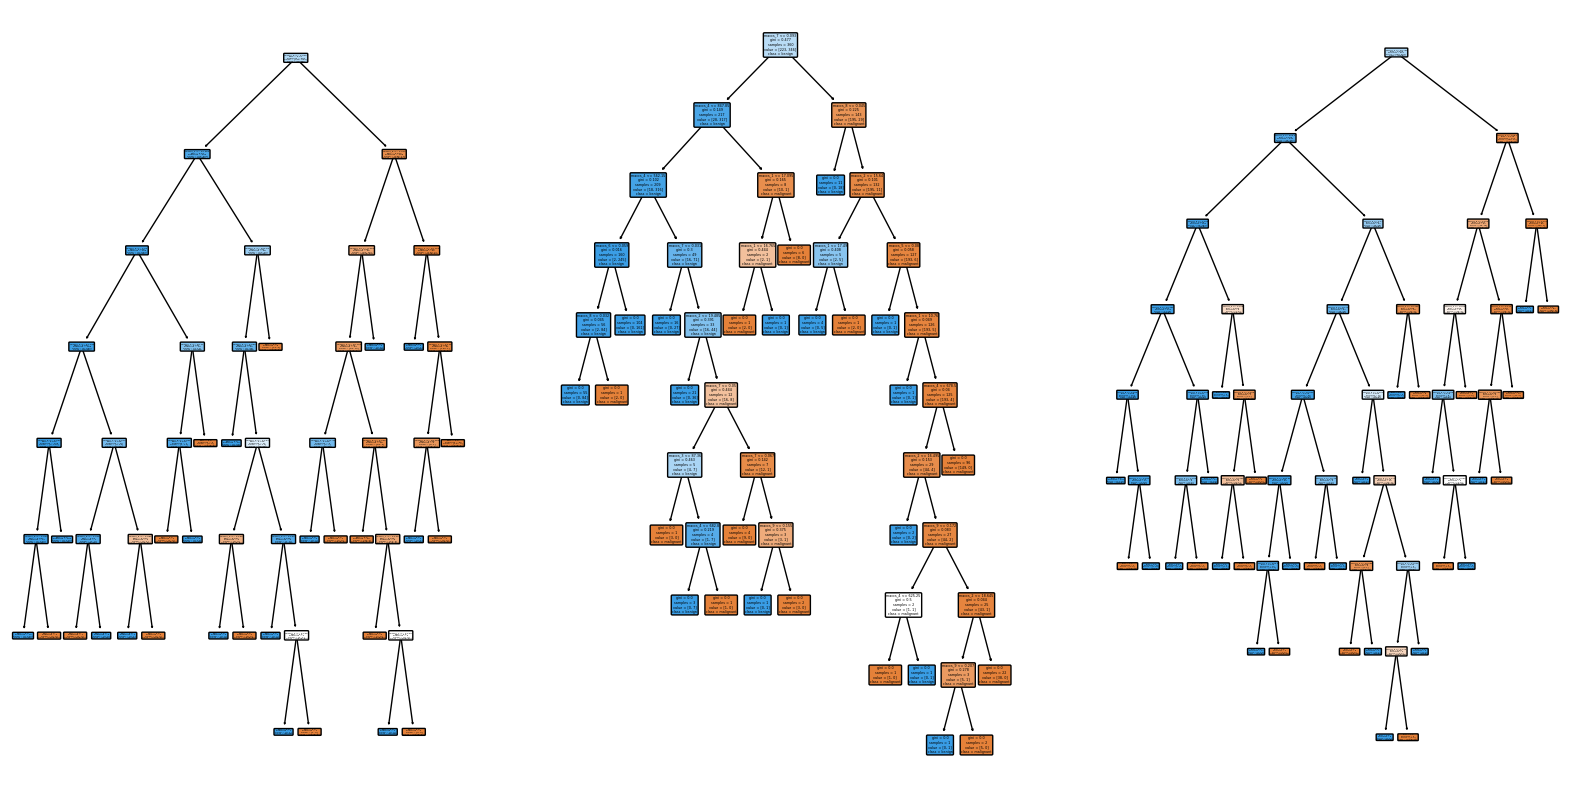

In [31]:
# 처음 세 개의 트리 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))  # 플롯 사이즈 조정
for index in range(0, 3):
    plot_tree(forest.estimators_[index], filled=True, feature_names=X.columns, class_names=["malignant", "benign"], rounded=True, ax=axes[index])
plt.show()

## random forest classifier의 시각화

위 그림은 random forest classifier의 시각화 결과입니다. random forest classifier는 여러 개의 decision tree를 사용하여 데이터를 분류하는 방법입니다. random forest classifier는 여러 개의 decision tree를 사용하기 때문에 각각의 decision tree를 시각화할 수 있습니다. 위 그림은 random forest classifier의 첫 번째, 두 번째, 세 번째 decision tree를 시각화한 것입니다.

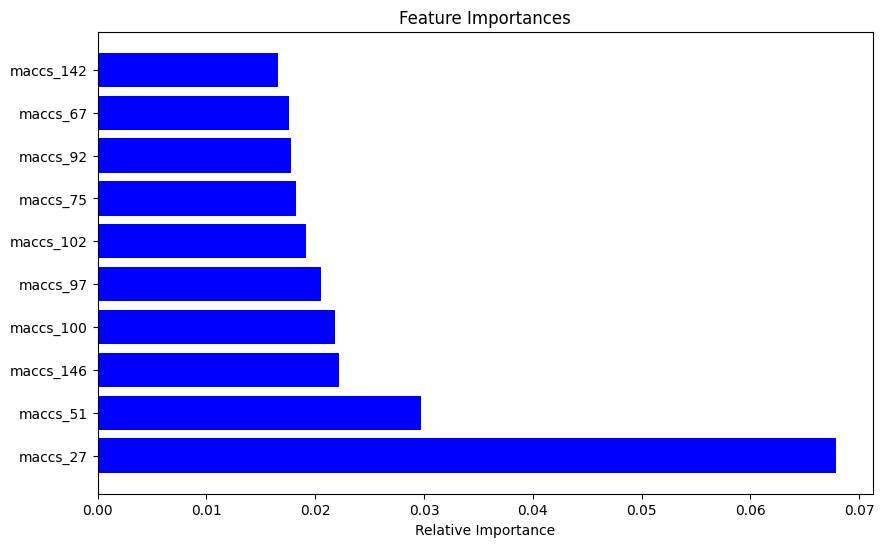

In [36]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# 모델 학습
model = RandomForestClassifier()
model.fit(X, y)

# 변수 중요도 계산
importances = model.feature_importances_
indices = np.argsort(importances)

# 데이터프레임으로 변환
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# 중요도 순으로 정렬하고 상위 10개만 선택
importances_df = importances_df.sort_values('importance', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(importances_df['feature'], importances_df['importance'], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

## random forest classifier 특성 중요도

random forest classifier은 각 특성의 중요도를 평가할 수 있습니다. random forest classifier에서의 변수 중요도는 각 결정 트리에서 사용된 모든 분할에 대해 그 분할이 얼마나 예측 성능을 향상시켰는지는 측정해 계산됩니다. 


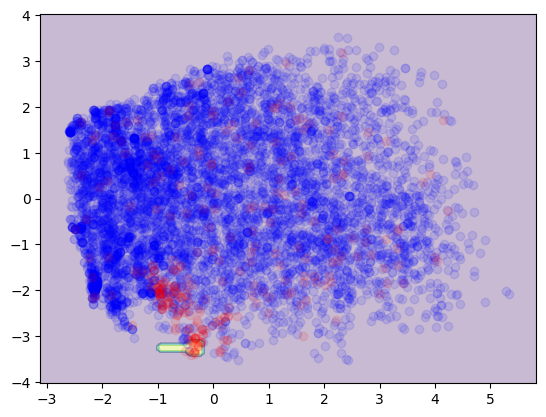

array([[6955,    1],
       [ 290,   19]])

In [34]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 트리 모델 학습
model_pca = RandomForestClassifier(max_depth=3, random_state=42)
model_pca.fit(X_pca, y)

# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = model_pca.predict(X_new).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
plt.show()

confusion_matrix(y, model_pca.predict(X_pca))

## 결정 경계 시각화

위 그림은 PCA를 사용하여 피처를 2개로 줄인 후 random forest classifier를 학습한 결과입니다. 결정 경계가 decision tree classifier와 달리 나타납니다. 이는 random forest classifier의 결정경계가 여러 decision tree의 앙상블로 결정되기 때문입니다. 일반적인 경우 random forest classifier은 decision tree classifier에 비해 더 강력한 성능을 보입니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다.

In [33]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[6943,   13],
       [ 186,  123]])

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 6943개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 13개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 186개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 123개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)